In [1]:
# Enable multiple outputs of a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [8]:
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt 
import numpy
import pandas as pd

[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0]

{1: Text(1.0, 8.514948963609798e-09, '1'),
 4: Text(0.6234898099391866, 0.7818314848003564, '4'),
 6: Text(-0.22252090581754597, 0.9749278775307834, '6'),
 2: Text(-0.9009687849123551, 0.4338838097407542, '2'),
 3: Text(-0.9009687849123551, -0.43388373310621353, '3'),
 5: Text(-0.22252096542218872, -0.9749278605008853, '5'),
 7: Text(0.6234896311252583, -0.7818315869797438, '7')}

Text(0.6234898099391866, 0.7818314848003564, '')

Text(-0.22252090581754597, 0.9749278775307834, '')

Text(-0.22252090581754597, 0.9749278775307834, '')

Text(0.6234896311252583, -0.7818315869797438, '')

Text(-0.9009687849123551, 0.4338838097407542, '')

Text(-0.9009687849123551, 0.4338838097407542, '')

Text(-0.9009687849123551, 0.4338838097407542, '')

Text(-0.22252096542218872, -0.9749278605008853, '')

Text(0.6234896311252583, -0.7818315869797438, '')

Text(-0.9009687849123551, -0.43388373310621353, '')

Text(-0.22252096542218872, -0.9749278605008853, '')

Text(0.6234896311252583, -0.7818315869797438, '')

Text(-0.22252096542218872, -0.9749278605008853, '')

Text(0.6234896311252583, -0.7818315869797438, '')

(-0.9960172241579729,
 1.0950484392456177,
 -1.0724206474024687,
 1.0724206644323668)

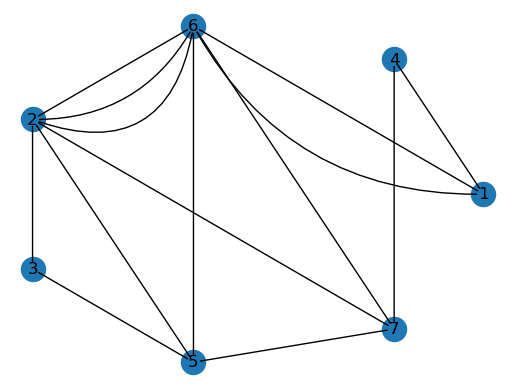

7

14

[[0 1 2 0 0 0 0]
 [1 0 0 0 0 0 1]
 [2 0 0 3 0 1 1]
 [0 0 3 0 1 1 1]
 [0 0 0 1 0 1 0]
 [0 0 1 1 1 0 1]
 [0 1 1 1 0 1 0]]


In [9]:
G = nx.MultiGraph()#Create an empty graph 
edgelist1=[(1,4),(1,6), (1,6), (2,3), (2,5), (2,7), (2,6), (2,6),(3,5),(4,7),(5,7),(5,6),
          (6,2),(6,7)]
# edgelist2=[(4,4)]
G.add_edges_from( edgelist1 )

pos = nx.circular_layout(G)  # layout for all nodes 
# draw nodes, labels
nx.draw_networkx_nodes(G, pos, node_size = 300)
nx.draw_networkx_labels(G, pos)
# draw multi-edges
ax = plt.gca()
for e in G.edges:
    ax.annotate("",
                xy=pos[e[0]], xycoords='data',
                xytext=pos[e[1]], textcoords='data',
                arrowprops=dict(arrowstyle="-", 
                                shrinkA=5, shrinkB=5,
                                patchA=None, patchB=None,
                                connectionstyle="arc3,rad=rrr".replace('rrr',str(0.3*e[2])
                                ),
                                ),
                )

#Add self-loops
# G.add_edges_from(edgelist2)
#draw self-loops
# nx.draw_networkx_edges(G, pos, edgelist=edgelist2, arrowstyle="-|-")

plt.axis('off')
plt.savefig('lab_2_d.png')
plt.show()
G.number_of_nodes()
G.number_of_edges()
A = nx.adjacency_matrix(G)
print(A.todense())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

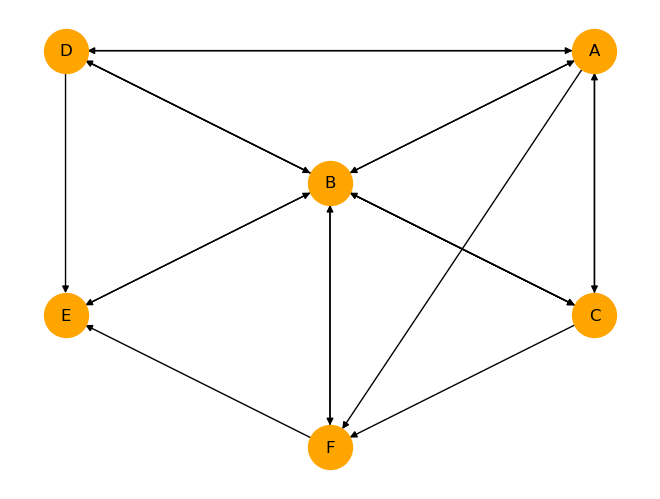

In [19]:


G = nx.MultiDiGraph()

edgelist = [('D', 'B'), ('B', 'E'), ('E', 'B'), ('B', 'F'), ('F', 'B'), 
            ('A', 'B'), ('B', 'A'), ('B', 'C'), ('C', 'B'), ('A', 'C'), 
            ('C', 'A'), ('A', 'D'), ('D', 'A'), ('C', 'D'), ('D', 'C'), 
            ('D', 'E'), ('F', 'E'), ('C', 'F'), ('A', 'F')]

G.add_edges_from(edgelist)

pos = {
    'A': (2, 1),
    'B': (1, 0),
    'C': (2, -1),
    'D': (0, 1),
    'E': (0, -1),
    'F': (1, -2)
}

nx.draw(G, pos, with_labels=True, node_size=1000, node_color="orange", arrows=True)

plt.show()


# BIPARTITE NETWORK

Incidence Matrix:
[[-1. -1. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1. -1. -1. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1. -1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -1. -1. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1. -1.]
 [ 0.  1.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.]
 [ 0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.]]


Text(0.5, 1.0, 'Bipartite Network')

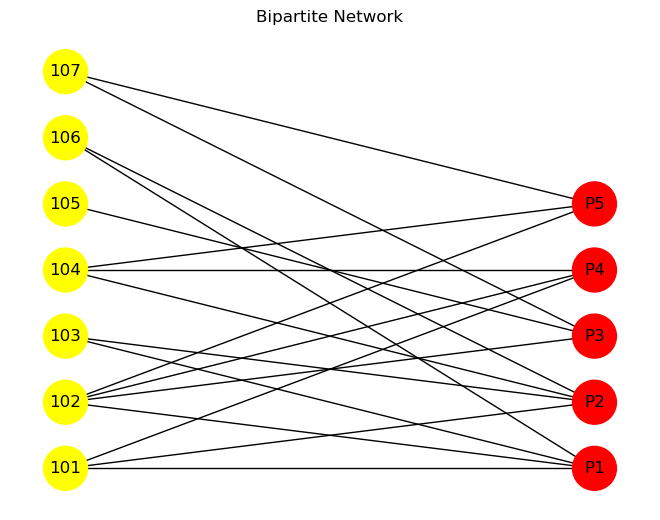

<Figure size 1000x500 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Customer Projection')

<Axes: >

Text(0.5, 1.0, 'Product Projection')

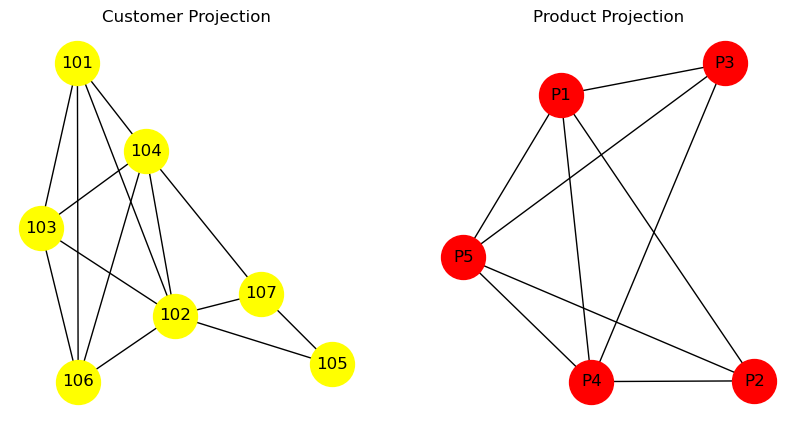

In [17]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Create a bipartite graph
B = nx.Graph()

# Add nodes with the node attribute "bipartite"
customers = ["101", "102", "103", "104", "105", "106", "107"]
products = ["P1", "P2", "P3", "P4", "P5"]
B.add_nodes_from(customers, bipartite=0)  # Customer nodes
B.add_nodes_from(products, bipartite=1)   # Product nodes

# Edges represent relationships between customers and products
edges = [("P2", "103"), ("P2", "106"), ("P2", "101"), ("P2", "104"), 
                  ("P1", "103"), ("P1", "106"), ("P1", "101"), ("P1", "102"),
                  ("P3", "102"), ("P3", "107"), ("P3", "105"), 
                  ("P4", "101"), ("P4", "104"), ("P4", "102"), 
                  ("P5", "104"),("P5", "102"),("P5", "107") ]

# Add edges to the graph
B.add_edges_from(edges)

# Compute the incidence matrix
incidence_matrix = nx.incidence_matrix(B, oriented=True).todense()
print("Incidence Matrix:")
print(incidence_matrix)

# Draw the bipartite network
pos = {node: [0, i] for i, node in enumerate(customers)}
pos.update({node: [1, i] for i, node in enumerate(products)})
nx.draw(B, pos, with_labels=True, node_color=['yellow' if node in customers else 'red' for node in B], node_size=1000)

plt.title("Bipartite Network")
plt.show()

# Project the bipartite network onto customers and products
customer_nodes, product_nodes = nx.bipartite.sets(B)
product_projection = nx.bipartite.projected_graph(B, product_nodes)
customer_projection = nx.bipartite.projected_graph(B, customer_nodes)

# Draw the two projected graphs
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
nx.draw(customer_projection, with_labels=True, node_color="yellow", node_size=1000)
plt.title("Customer Projection")

plt.subplot(1, 2, 2)
nx.draw(product_projection, with_labels=True, node_color="red", node_size=1000)
plt.title("Product Projection")

plt.show()
